In [21]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/manishanker/Statistics_ML_26Aug/master/ratings.csv')

In [23]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [24]:
df.shape

(100836, 4)

In [25]:
# how many different users are there? ---> 610
# how many different movies are there? ----> 9724
# how many different ratings are there? ----> 10

In [26]:
len(df['userId'].unique())

610

In [27]:
len(df['movieId'].unique())

9724

In [28]:
len(df['rating'].unique())

10

In [29]:
df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [30]:
df1 = pd.read_csv('https://raw.githubusercontent.com/manishanker/Statistics_ML_26Aug/master/movies.csv')

In [31]:
df1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [32]:
movie_data = pd.merge(df, df1, on='movieId')

In [33]:
movie_data

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [34]:
movie_data.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [36]:
movie_data.groupby('title')['rating'].mean() \
.sort_values(ascending=False).head(10)

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Sorority House Massacre (1986)                   5.0
Bill Hicks: Revelations (1993)                   5.0
My Man Godfrey (1957)                            5.0
Hellbenders (2012)                               5.0
In the blue sea, in the white foam. (1984)       5.0
Name: rating, dtype: float64

In [38]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [42]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
ratings_mean_count

,rating
title,
'71 (2014),4.000000
'Hellboy': The Seeds of Creation (2004),4.000000
'Round Midnight (1986),3.500000
'Salem's Lot (2004),5.000000
'Til There Was You (1997),4.000000
...,...
eXistenZ (1999),3.863636
xXx (2002),2.770833
xXx: State of the Union (2005),2.000000


In [50]:
ratings_mean_count['ratings count'] = movie_data.groupby('title')['rating'].count()

In [97]:
#ratings_mean_count.sort_values(by='ratings count', ascending=False)
ratings_mean_count

,rating,ratings count
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


### How to find the counts of ratings given to a specific movie name - My Love(2006)

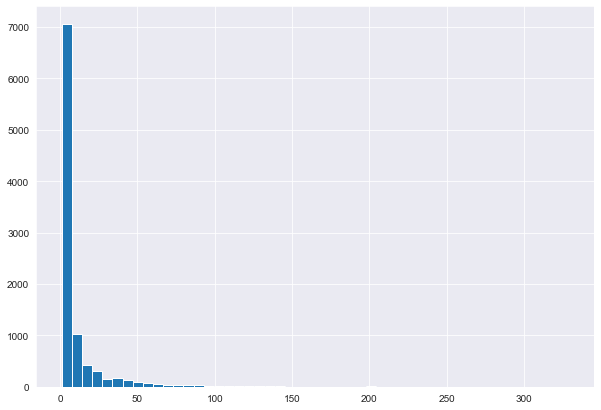

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,7))
sns.set_style(style='darkgrid')
plt.hist(ratings_mean_count['ratings count'], bins=50)
plt.show()

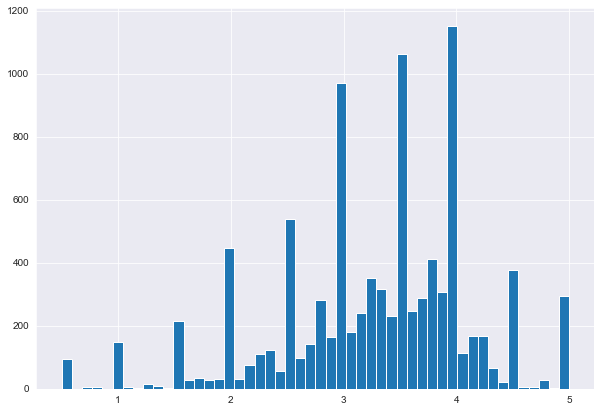

In [65]:
sns.set_style(style='darkgrid')
%matplotlib inline
plt.figure(figsize=(10,7))
plt.hist(ratings_mean_count['rating'], bins=50)
plt.show()

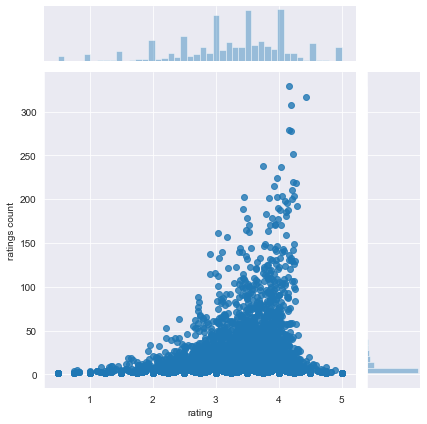

In [70]:
sns.jointplot(x='rating', y='ratings count', data=ratings_mean_count, alpha=0.8)

In [71]:
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [73]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')

In [74]:
user_movie_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
forest_gump_ratings = user_movie_rating['Forrest Gump (1994)']

In [117]:
forest_gump_ratings

userId
1      4.0
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    4.0
607    NaN
608    3.0
609    4.0
610    3.0
Name: Forrest Gump (1994), Length: 610, dtype: float64

In [118]:
movies_like_forest_gump = user_movie_rating.corrwith(forest_gump_ratings)
corr_forest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])
corr_forest_gump.dropna(inplace=True)
corr_forest_gump.head()

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [119]:
corr_forest_gump = corr_forest_gump.sort_values('Correlation', ascending=False)
corr_forest_gump.head(10)

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


In [127]:
corr_forest_gump = corr_forest_gump.join(ratings_mean_count['ratings count'])

In [128]:
corr_forest_gump

,Correlation,ratings count
title,,
Lost & Found (1999),1.0,2
"Century of the Self, The (2002)",1.0,2
The 5th Wave (2016),1.0,2
Play Time (a.k.a. Playtime) (1967),1.0,3
Memories (Memorîzu) (1995),1.0,3
...,...,...
Jupiter Ascending (2015),-1.0,2
The Cobbler (2015),-1.0,2
The Amazing Screw-On Head (2006),-1.0,3


In [129]:
corr_forest_gump[corr_forest_gump['ratings count']>50].sort_values('Correlation', ascending=False)

,Correlation,ratings count
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52
...,...,...
Harry Potter and the Prisoner of Azkaban (2004),-0.131888,93
Ed Wood (1994),-0.163673,70
Zoolander (2001),-0.182810,54
